In [20]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import argparse

Method definition

In [21]:
def plot_grid(X, y, grid_size):# Define the grid size
    # Create a figure to hold the images
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(8, 10))

    for i in range(grid_size):
        for j in range(grid_size):
            # Calculate the index into the image array
            index = i * grid_size + j
            
            # Display the image
            axes[i, j].imshow(X[index], cmap='gray')
            
            # Remove the axis
            axes[i, j].axis('off')
            
    # Show the plot
    plt.show()


def print_metrics(predictions, X_test, y_test, H, epochs):

    print(classification_report(y_test.argmax(axis=1),	predictions.argmax(axis=1)))

    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()

Loading the dataset

In [22]:
# Split the data into training and validation
print("[INFO] loading MNIST data...")
((X_train, y_train), (X_test, y_test)) =  mnist.load_data()

[INFO] loading MNIST data...


Analyze the size of the dataset

In [23]:
print("Size of X_train: ", X_train.shape[0])
print("Size of X_test: ", X_test.shape[0])

print("Total size of dataset: ", X_train.shape[0] + X_test.shape[0])


print("Training data percentage: ", X_train.shape[0] / (X_train.shape[0] + X_test.shape[0]))
print("Test data percentage: ", X_test.shape[0] / (X_train.shape[0] + X_test.shape[0]))


Size of X_train:  60000
Size of X_test:  10000
Total size of dataset:  70000
Training data percentage:  0.8571428571428571
Test data percentage:  0.14285714285714285


In [24]:
# Count the number of different cases in a list
unique, counts = np.unique(y_train, return_counts=True)
print("Number of cases and their distribution in the training dataset: ", dict(zip(unique, counts)))

Number of cases and their distribution in the training dataset:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


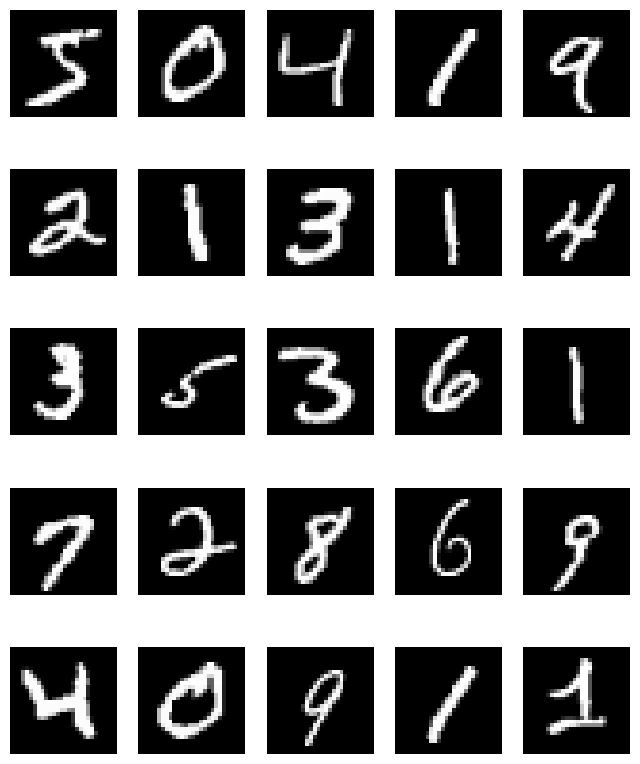

In [25]:
plot_grid(X_train, y_train, 5)

Preparation of input data

In [26]:
# We normalise the image values between 0 and 1.
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [27]:
print("Size of image", X_train[0].shape)
print("---------")
print("Image vector size", X_train[0].shape[0] * X_train[0].shape[1])
print("Image vector size", X_train[0].flatten().shape[0])

Size of image (28, 28)
---------
Image vector size 784
Image vector size 784


In [28]:
# We convert the images (matrices) into flat vectors of 3072 elements.
X_train = X_train.reshape((X_train.shape[0], 784))
X_test = X_test.reshape((X_test.shape[0], 784))

In [29]:
# We bin the tags (one-hot encoding), converting them from a numerical value to a vector of 10 elements.
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

print(f"New label structure -> {y_test[0]}")

New label structure -> [0 0 0 0 0 0 0 1 0 0]


### Neural Network Design

At this point, we have prepared the input data, so the requirements for the design of the NR will be:

 - Must have **3072** neurons in the **input** layer.
 - It must have **10** neurons in the **output** layer.
 - We need a multicalse sorting activation function -> **softmax**.

In [30]:
model = Sequential()
model.add(Dense(1024, input_shape=(784,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [31]:
sgd = SGD(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(X_train, y_train, validation_data=(X_test, y_test),
 	epochs=50, batch_size=150)

Epoch 1/50
400/400 [==============================] - 4s 9ms/step - loss: 1.1238 - accuracy: 0.7666 - val_loss: 0.5406 - val_accuracy: 0.8782
Epoch 2/50
400/400 [==============================] - 5s 13ms/step - loss: 0.4612 - accuracy: 0.8844 - val_loss: 0.3797 - val_accuracy: 0.9017
Epoch 3/50
400/400 [==============================] - 5s 11ms/step - loss: 0.3658 - accuracy: 0.9006 - val_loss: 0.3241 - val_accuracy: 0.9118
Epoch 4/50
400/400 [==============================] - 5s 12ms/step - loss: 0.3239 - accuracy: 0.9105 - val_loss: 0.2963 - val_accuracy: 0.9188
Epoch 5/50
400/400 [==============================] - 5s 12ms/step - loss: 0.2975 - accuracy: 0.9168 - val_loss: 0.2770 - val_accuracy: 0.9226
Epoch 6/50
400/400 [==============================] - 5s 12ms/step - loss: 0.2779 - accuracy: 0.9215 - val_loss: 0.2605 - val_accuracy: 0.9278
Epoch 7/50
400/400 [==============================] - 4s 11ms/step - loss: 0.2622 - accuracy: 0.9260 - val_loss: 0.2473 - val_accuracy: 0.9300


##### Making inference with the trained model

We use the trained model to precede an image.

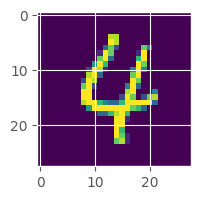

In [32]:
# We visualise the image before classification
index = 109

plt.figure(figsize=(2,2))
plt.imshow(X_test[index].reshape(28, 28))

In [33]:
# We pass the image to the model to obtain the prediction.
prediction = model.predict(X_test[index].reshape(1, 784))
prediction.argmax(axis=1)

print("Class predicted for the image", prediction.argmax(axis=1)[0])

1/1 [==============================] - 0s 130ms/step
Class predicted for the image 4


### Analysing the training

In [34]:
predictions = model.predict(X_test, batch_size=150)

print(classification_report(y_test.argmax(axis=1),	predictions.argmax(axis=1)))

67/67 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



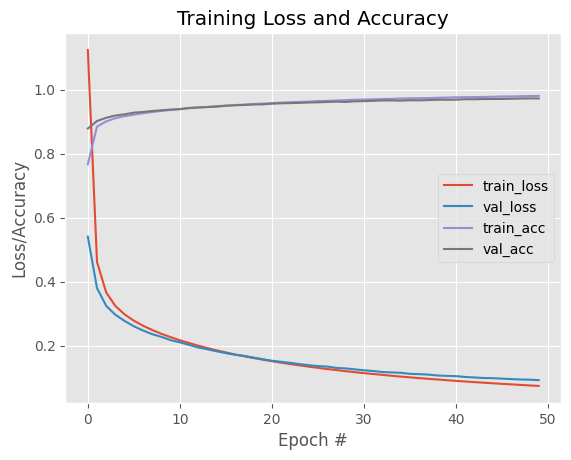

In [35]:
print_metrics(predictions, X_test, y_test, H, 50)